In [84]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
from sklearn.model_selection import train_test_split


In [85]:
X,y = mglearn.datasets.make_wave(n_samples=40)

# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# 이웃 수를 3으로 하여 객체 생성
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타겟을 사용하여 모델을 학습
reg.fit(X_train, y_train)

# 테스트 세트 예측
print(format(reg.predict(X_test)))

# 테스트 세트 R^2
print(format(reg.score(X_test,y_test)))

# test Size를 바꿈
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size = 0.4)


# 테스트 세트 예측
print(format(reg.predict(X_test)))

# 테스트 세트 R^2(바뀜)
print(format(reg.score(X_test,y_test)))

[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]
0.8344172446249605
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139
 -0.272  1.375 -1.139  0.421 -0.447  0.357]
0.7886360084873423


X_triam,shape : {} (24, 1) X_test,shape : {} (16, 1)
X_triam,shape : {} (24, 1) X_test,shape : {} (16, 1)
X_triam,shape : {} (24, 1) X_test,shape : {} (16, 1)


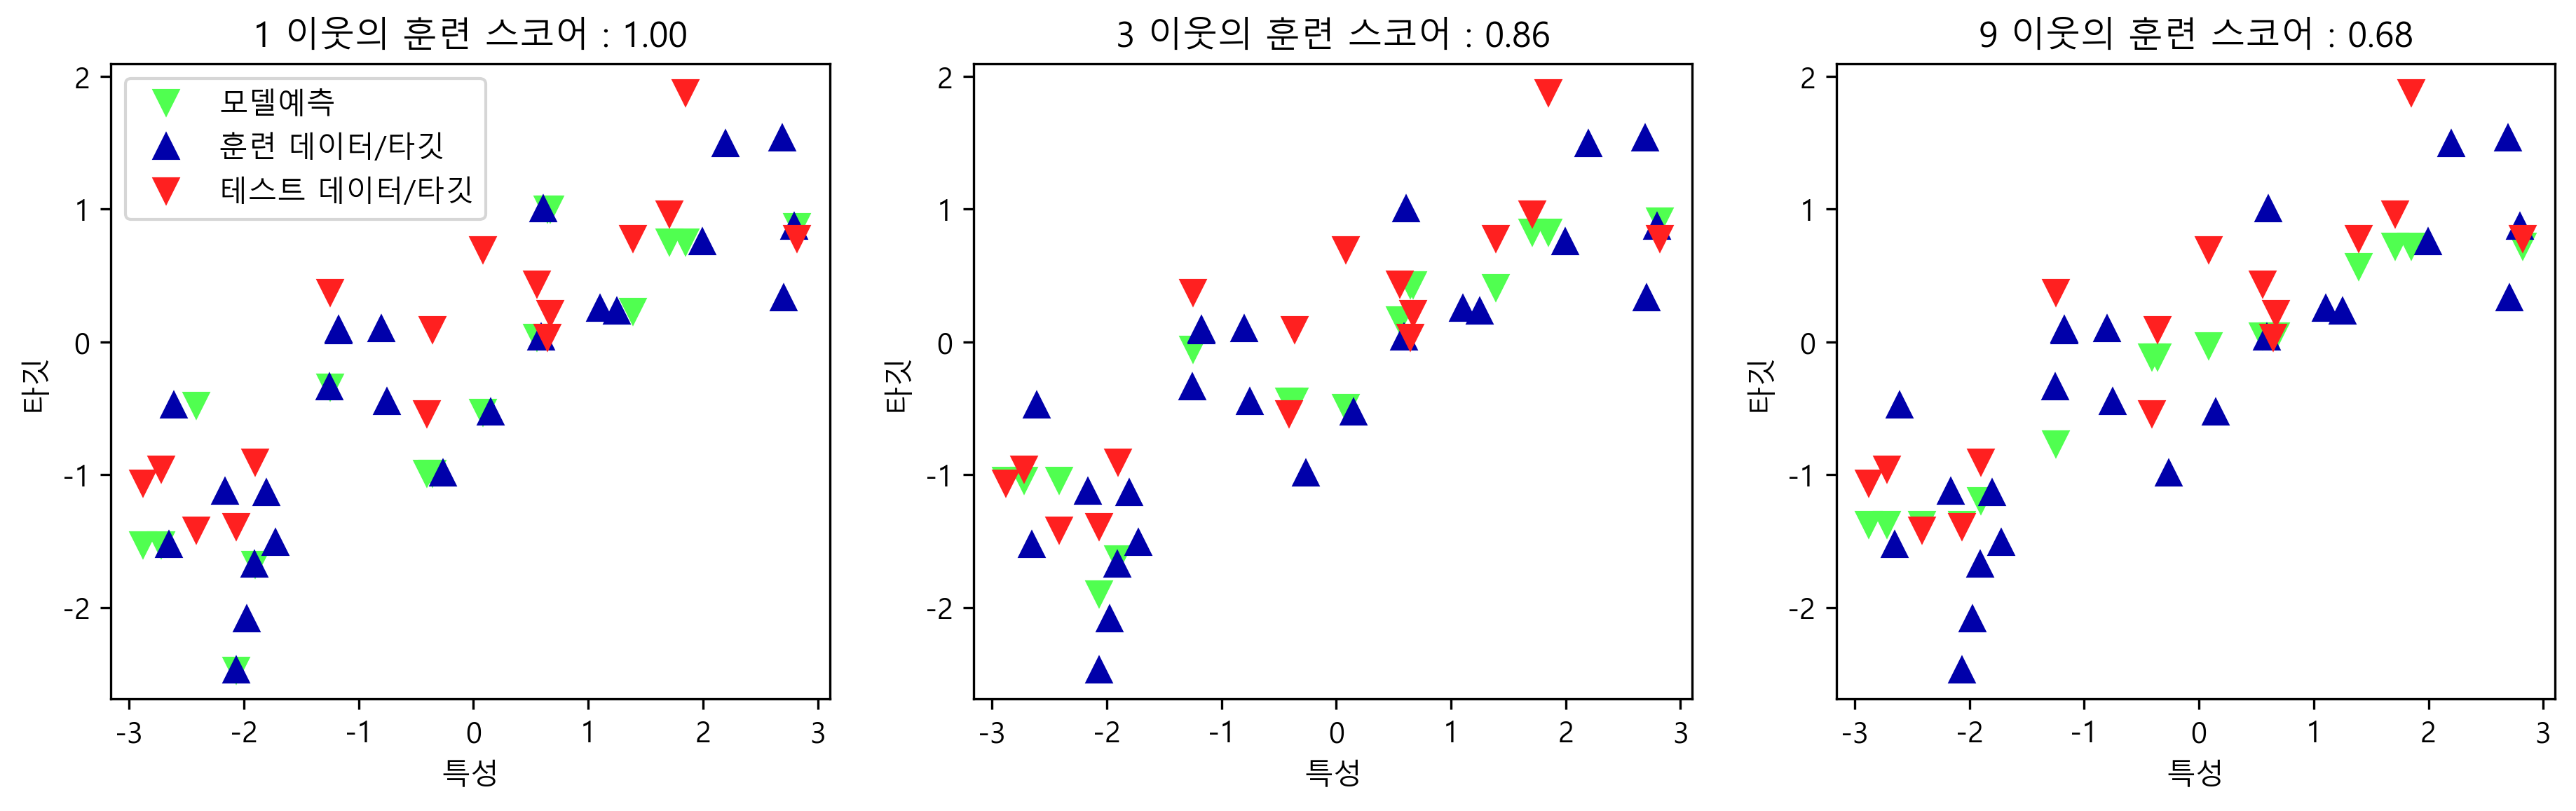

In [89]:
fig, axes = plt.subplots(1,3,figsize = (15,4))

for neighbors, ax in zip([1,3,9],axes):
    # 1,3,9 일때 예측
    reg = KNeighborsRegressor(n_neighbors=neighbors)
    print("X_triam,shape : {}",format(X_train.shape), "X_test,shape : {}", format(X_test.shape))
    reg.fit(X_train,y_train)
    ax.plot(X_test, reg.predict(X_test),'v', c= mglearn.cm3(2),markersize=8)
    ax.plot(X_train,y_train,'^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)

    ax.set_title("{} 이웃의 훈련 스코어 : {:.2f}".format(neighbors,reg.score(X_train,y_train), reg.score(X_test,y_test)))
    # x,y이름 세팅
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

60개 훈련 세트 : 0.67
60개 테스트 세트 점수 : 0.66
coef_ :  [0.394]
intercept_: -0.031804343026759746
100개 훈련 세트 : 0.59
100개 테스트 세트 점수 : 0.66
500개 훈련 세트 : 0.68
500개 테스트 세트 점수 : 0.57


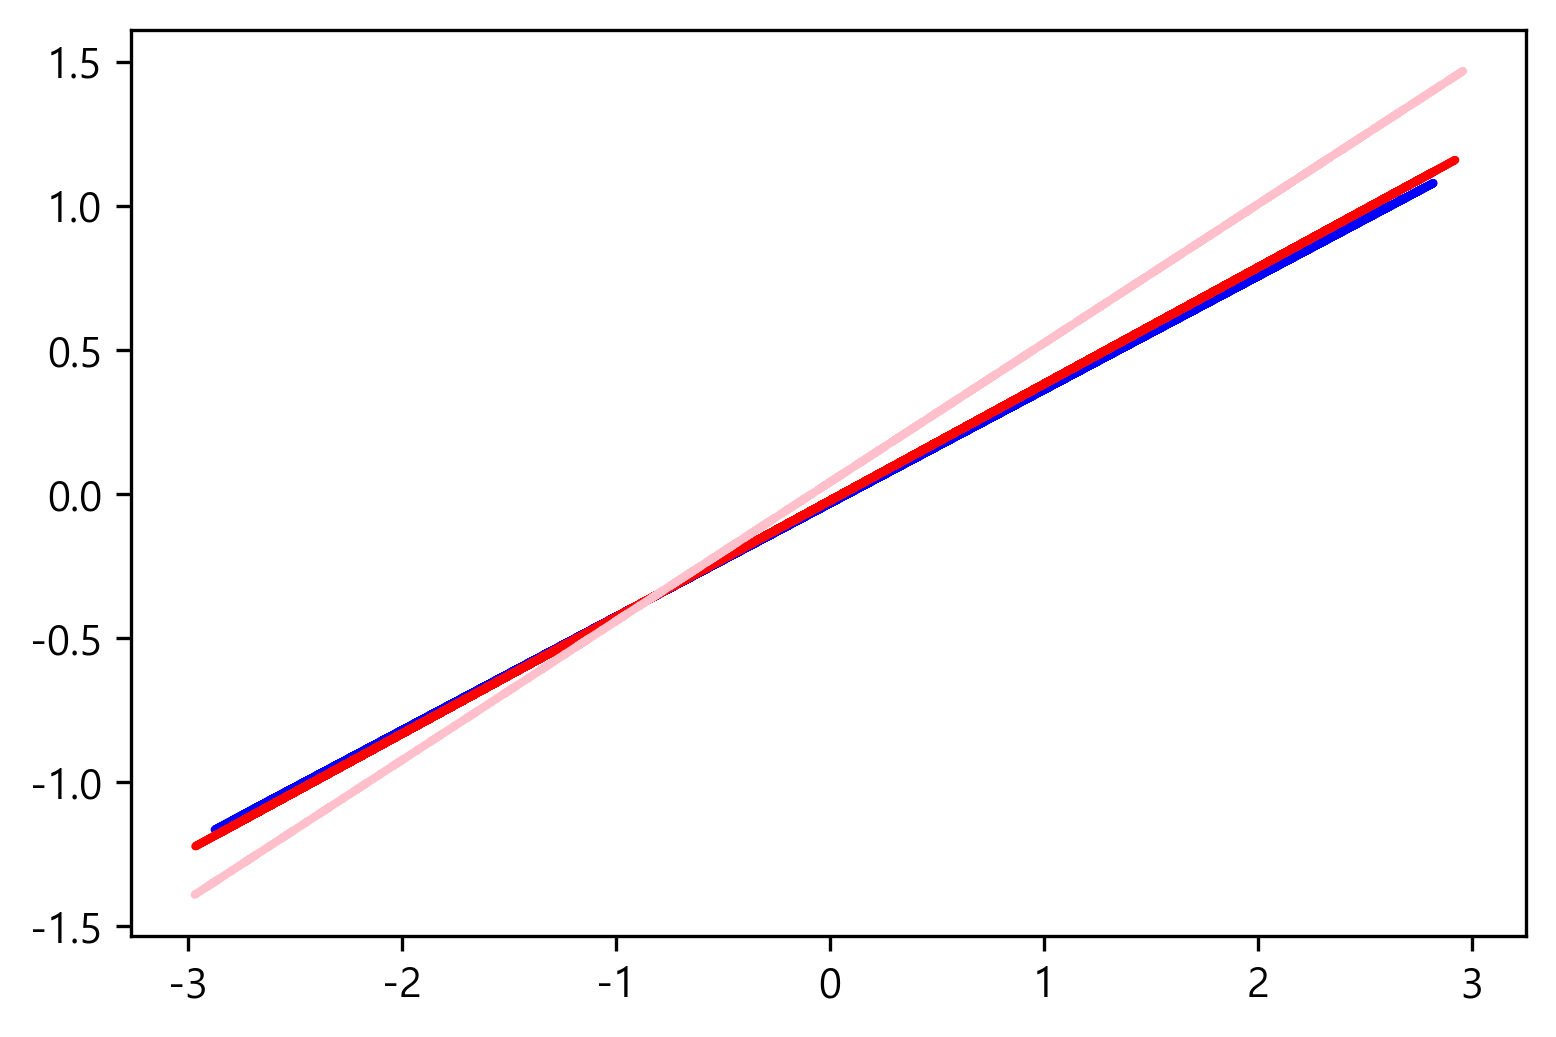

In [122]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

print("60개 훈련 세트 : {:.2f}".format(lr.score(X_train,y_train)))
print("60개 테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))

# 기울기와 절편 제공 coef_ : 기울기, intercept_: 절편
print("coef_ : ",lr.coef_)
print("intercept_:", lr.intercept_)

# 점이 너무 많이 나와서 점은 표기를 하지 않음.
# plt.plot(X,y,'o')

predict = lr.predict(X)
plt.plot(X, predict, color='blue')
# 60 개와 구별을 위해 100 개짜리는 핑크로 해봄

X, y = mglearn.datasets.make_wave(n_samples=100)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)
predict = lr.predict(X)

print("100개 훈련 세트 : {:.2f}".format(lr.score(X_train,y_train)))
print("100개 테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))
plt.plot(X, predict, color='red')

# 500개 짜리는 핑크로 해봄
X, y = mglearn.datasets.make_wave(n_samples=500)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)
predict = lr.predict(X)

print("500개 훈련 세트 : {:.2f}".format(lr.score(X_train,y_train)))
print("500개 테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))
plt.plot(X, predict, color='pink')

Linear
훈련 세트 점수: 0.68
테스트 세트 점수: 0.57
w[0] :  [0.482]  b:  0.04154708498957077
KNN
훈련 세트 점수: 0.85
테스트 세트 점수: 0.57


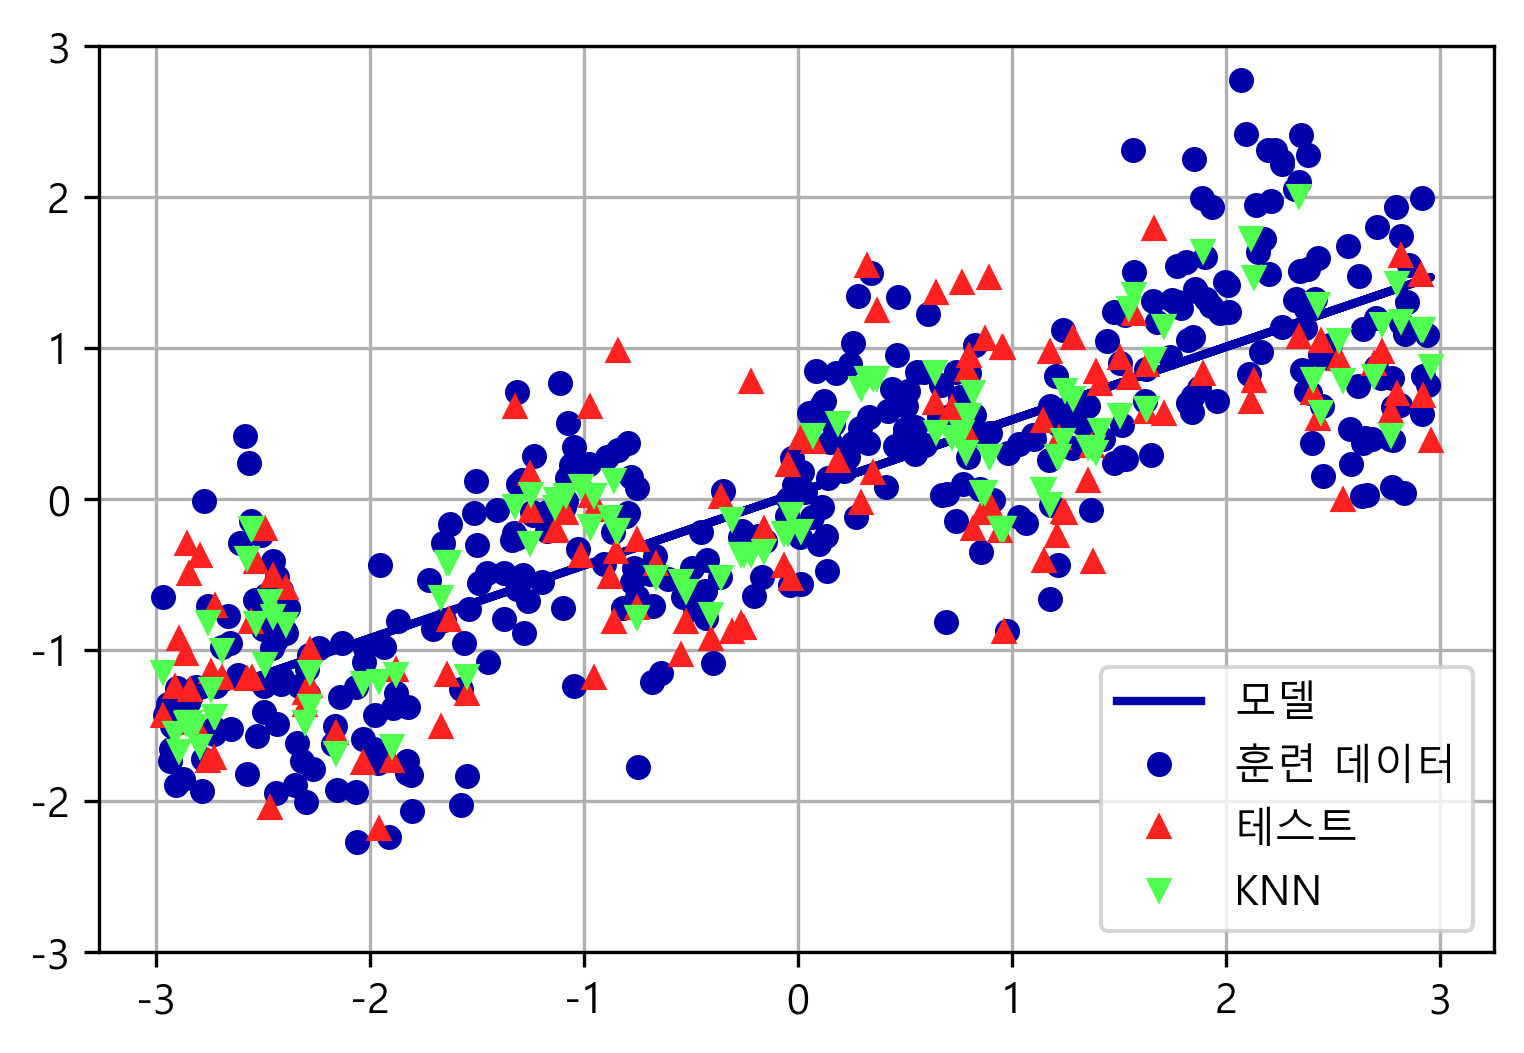

In [126]:
# knn과 선형의 비교

X,y = mglearn.datasets.make_wave(n_samples = 500)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
lr = LinearRegression().fit(X_train, y_train) 

knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)


print("Linear")
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
print("w[0] : ", lr.coef_, " b: ", lr.intercept_)

print("KNN")
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

plt.plot(X, lr.predict(X), c=mglearn.cm3(0))
plt.plot(X_train, y_train, 'o', markersize=5, c=mglearn.cm3(0))
plt.plot(X_test, y_test, '^', markersize=5,  c=mglearn.cm3(1))
plt.plot(X_test, knn.predict(X_test), 'v',markersize=5,  c=mglearn.cm3(2))

plt.ylim(-3,3)

plt.grid()
plt.legend(["모델", "훈련 데이터", "테스트", "KNN"], loc=4)

In [129]:
from sklearn.datasets import load_boston

boston = load_boston()
print("boston.keys():\n", boston.keys())
print("data의 크기 : ", boston.data.shape)
print("특성 이름:\n{}\n" , boston.feature_names)
print(boston['DESCR'] + "\n...")

df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())

boston.keys():
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
data의 크기 :  (506, 13)
특성 이름:
{}
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - 

(506,)
(1, 506)
(506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
w[0]: 9.102109  b: -34.670621


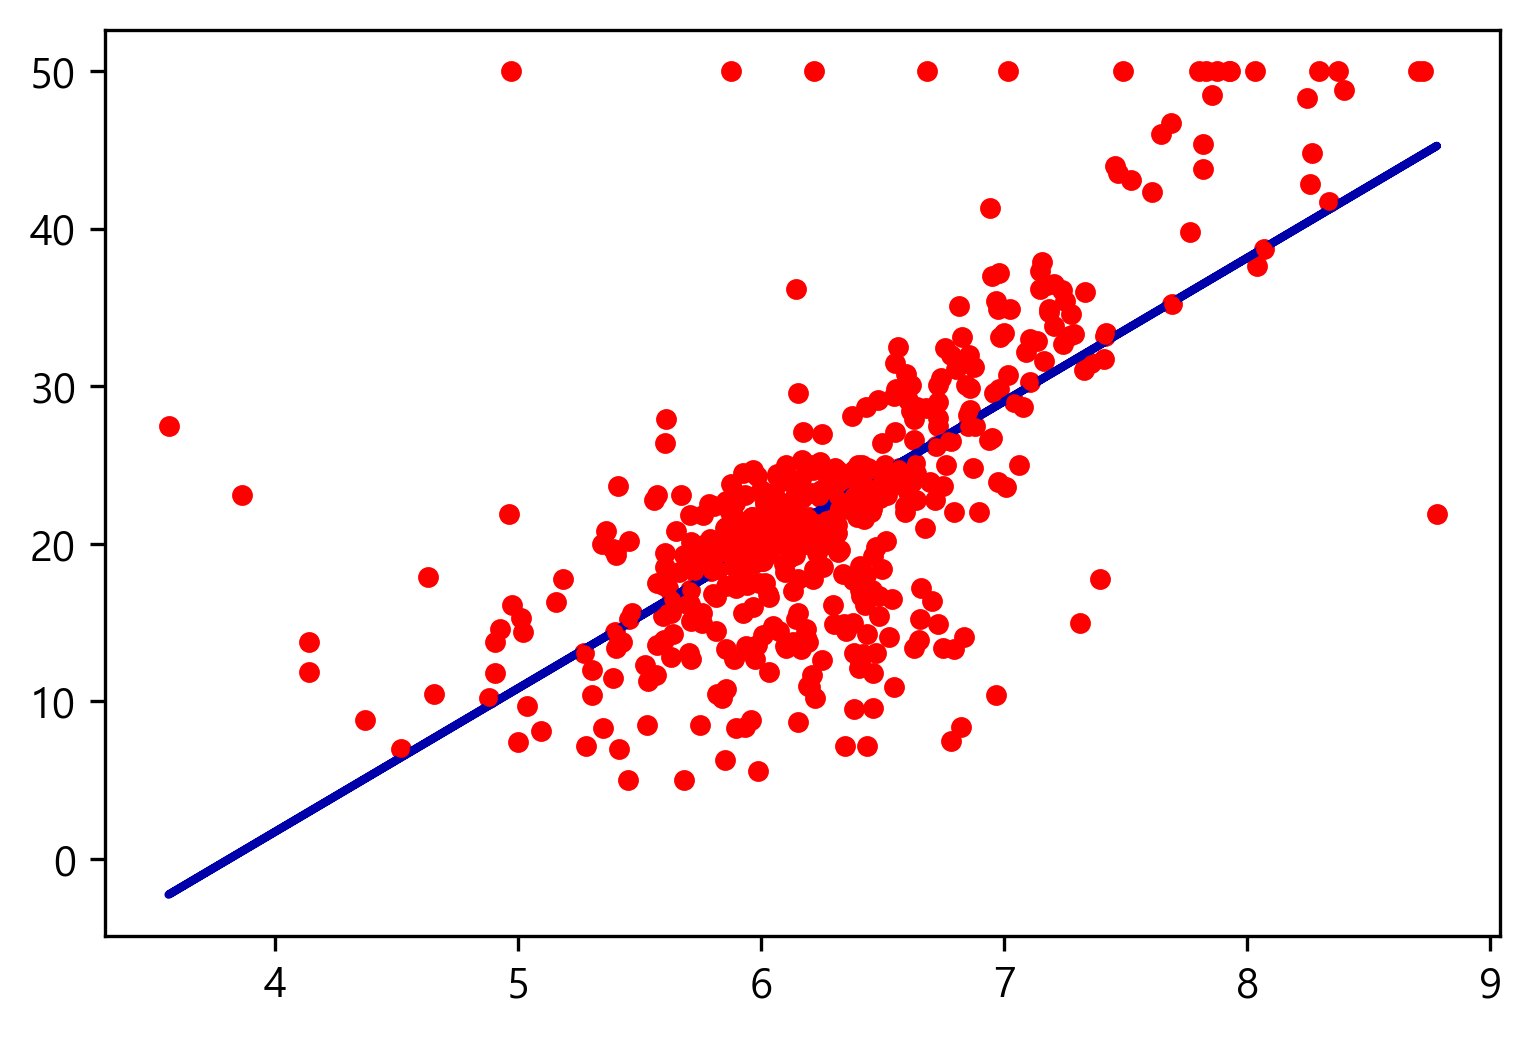

In [133]:
plt.plot(boston.data[:,5], boston.target, 'o', color='r', markersize=4)
X= boston.data[:,5]
print(X.shape)

X_1 = np.atleast_2d(X)
print(X_1.shape)
X_2 = np.transpose(X_1)

print(X_2.shape)
print(X_2[:5])
y= boston.target 

lr.fit(X_2, y)
y_predicted = lr.predict(X_2)

print("w[0]: %f  b: %f" % (lr.coef_, lr.intercept_))
plt.plot(X_2,y_predicted)
plt.plot(X_2,y,'o',color='r',markersize=3)

No handles with labels found to put in legend.
X_train.shape:(379, 13)


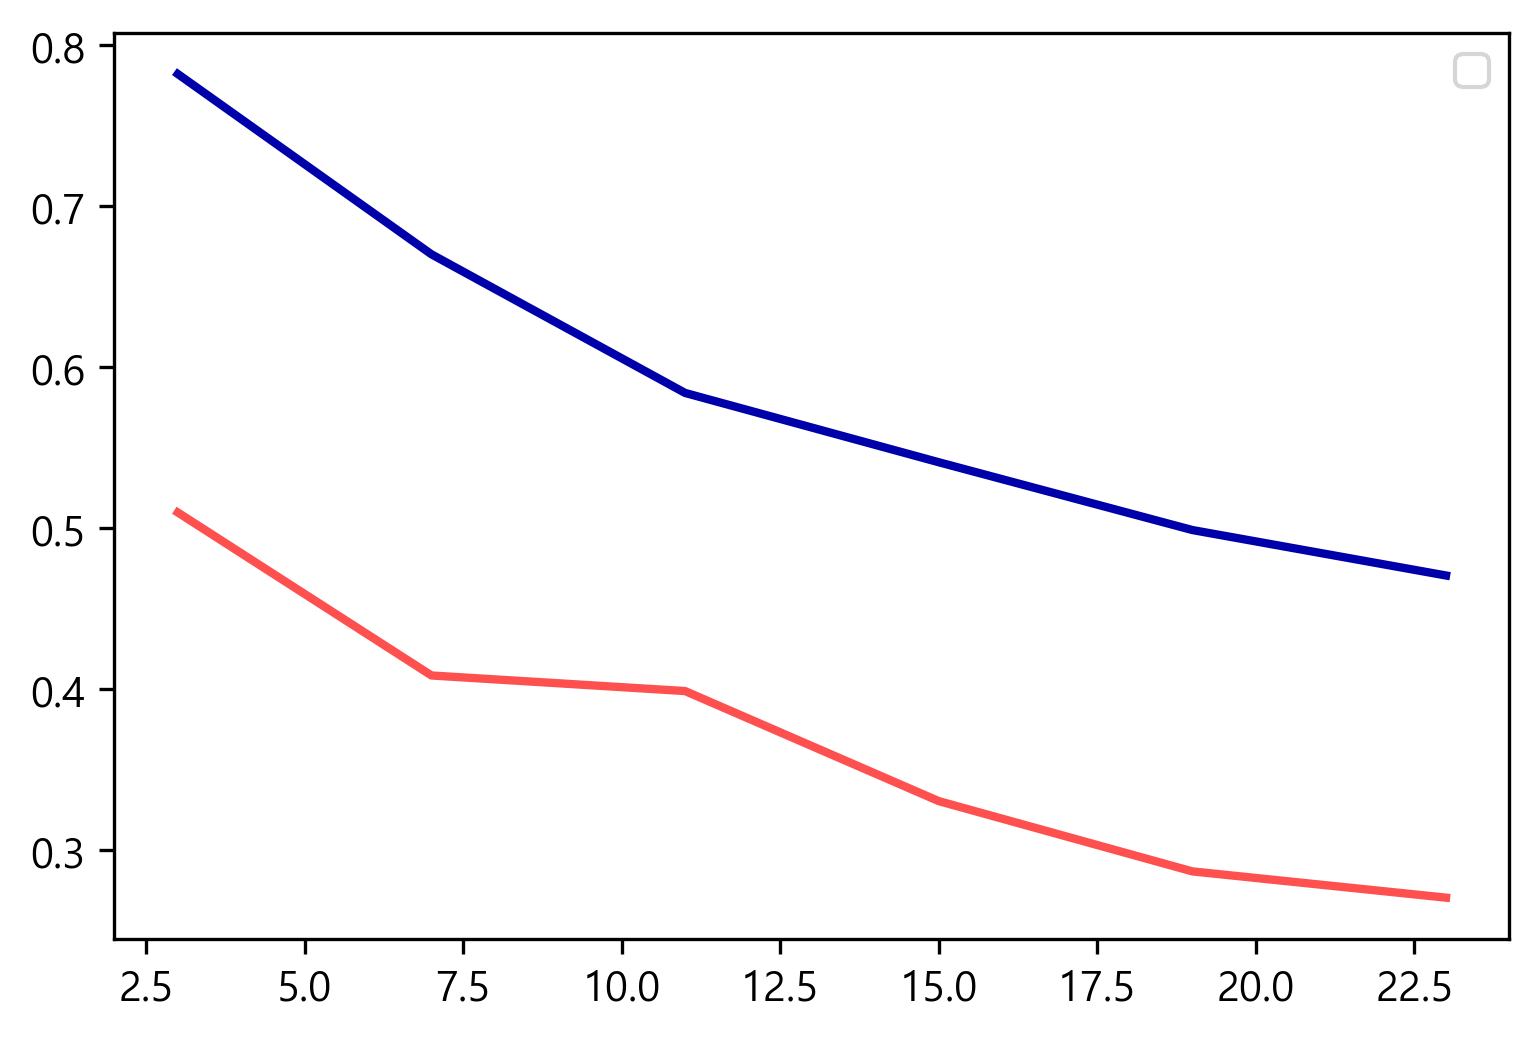

In [152]:

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape:{}".format(X_train.shape))

lr = LinearRegression().fit(X_train, y_train) 
ks = [3,7,11,15,19,23]

score=[]
for i in ks:
    knn = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    score.append([knn.score(X_train, y_train),knn.score(X_test, y_test)])

score = np.array(score)
# 파랑은 train, 빨강은 test모델
plt.plot(ks, score[:,0])
plt.plot(ks, score[:,1])
plt.legend()